In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12

문피아 유료 소설 시각화

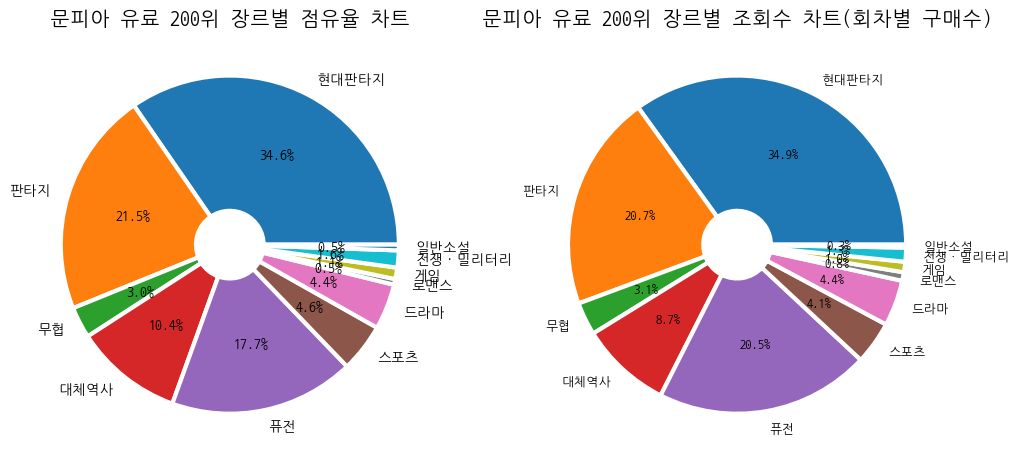

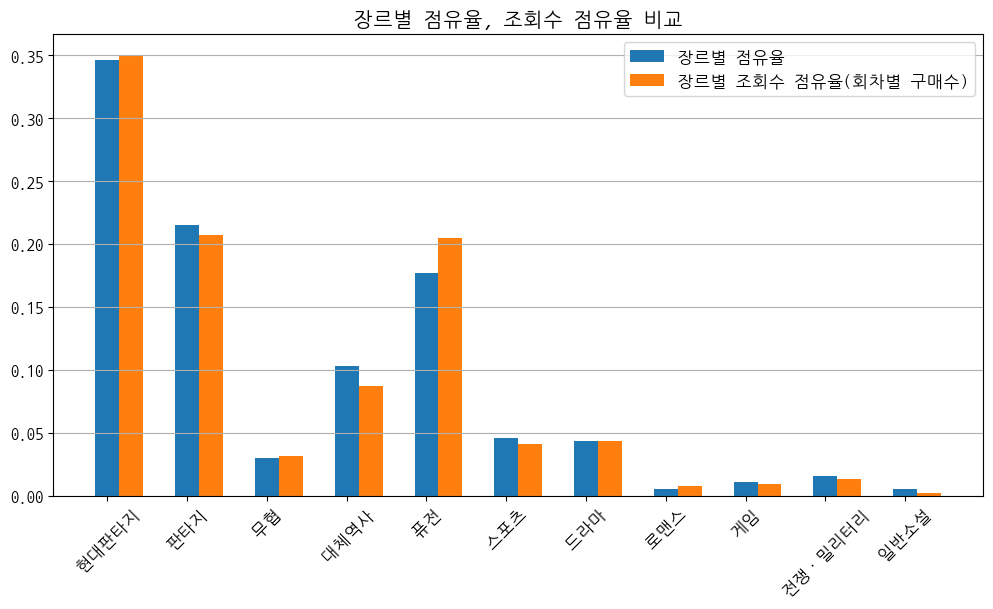

In [2]:
# 문피아 유료소설 200개 장르별 점유율 시각화
Mdf=pd.read_csv('./data/Munpia_pay200.txt', index_col=0)

M_hfan=Mdf.현대판타지.sum()
M_fan=Mdf.판타지.sum()
M_mu=Mdf.무협.sum()
M_his=Mdf.대체역사.sum()
M_fu=Mdf.퓨전.sum()
M_spo=Mdf.스포츠.sum()
M_dra=Mdf.드라마.sum()
M_roman=Mdf.로맨스.sum()
M_game=Mdf.게임.sum()
M_war=Mdf.전쟁·밀리터리.sum()
M_normal=Mdf.일반소설.sum()

# 장르 전체 숫자 구함
Mgenre_list = [M_hfan, M_fan, M_mu, M_his, M_fu, M_spo, M_dra, M_roman, M_game, M_war, M_normal]
Mgenres = ['현대판타지', '판타지', '무협', '대체역사', '퓨전', '스포츠', '드라마', '로맨스', '게임', '전쟁·밀리터리', '일반소설']
total = sum(Mgenre_list)

# 전체 장르 합계 만들고 점유율 구함
Mgenre_shares = [genre / total for genre in Mgenre_list]

# 장르별 점유율 구함
#print(Mgenre_shares)
#print(sum(Mgenre_shares))

#=============================================================================================================

# 데이터프레임의 '지수'열은 높을 수록 구매율, 결제율이 높다는 뜻임(90일 동안 구매수, 추천수 합) 
# 각 장르별 지수의 합을 구한 후 위의 차트로 만들고 장르별 점유율과 지수의 점유율 비교
sum_hfan = Mdf[Mdf.현대판타지 == True]['지수'].sum()
sum_fan = Mdf[Mdf.판타지 == True]['지수'].sum()
sum_mu = Mdf[Mdf.무협 == True]['지수'].sum()
sum_his = Mdf[Mdf.대체역사 == True]['지수'].sum()
sum_fu = Mdf[Mdf.퓨전 == True]['지수'].sum()
sum_sport = Mdf[Mdf.스포츠 == True]['지수'].sum()
sum_drama = Mdf[Mdf.드라마 == True]['지수'].sum()
sum_roman = Mdf[Mdf.로맨스 == True]['지수'].sum()
sum_game = Mdf[Mdf.게임 == True]['지수'].sum()
sum_war = Mdf[Mdf.전쟁·밀리터리 == True]['지수'].sum()
sum_normal = Mdf[Mdf.일반소설 == True]['지수'].sum()

Mgenre_gisu_sum_list = [sum_hfan, sum_fan, sum_mu, sum_his, sum_fu, sum_sport, sum_drama, sum_roman, sum_game, sum_war, sum_normal]
Mgenres_gisu = ['현대판타지', '판타지', '무협', '대체역사', '퓨전', '스포츠', '드라마', '로맨스', '게임', '전쟁·밀리터리', '일반소설']

# 전체 장르 합계(total_gisu) 만들고 장르별 지수의 점유율 구함
total_gisu = sum(Mgenre_gisu_sum_list)
Mgenre_gisu_shares = [genre_gisu / total_gisu for genre_gisu in Mgenre_gisu_sum_list]

# 장르별 지수의 점유율
# print(Mgenre_gisu_shares) 
# print(sum(Mgenre_gisu_shares)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.title('문피아 유료 200위 장르별 점유율 차트')
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(Mgenre_shares, labels=Mgenres, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 10})

plt.subplot(1,2,2)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.title('문피아 유료 200위 장르별 조회수 차트(회차별 구매수)')
plt.pie(Mgenre_gisu_shares, labels=Mgenres_gisu, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 9})

plt.figure(figsize=(12,6))
index = np.arange(len(Mgenre_shares)) # 11개 0 ~ 10
index
w = 0.3

plt.bar(index, Mgenre_shares, label='장르별 점유율', width=w)
plt.bar(index+w, Mgenre_gisu_shares, label='장르별 조회수 점유율(회차별 구매수)', width=w)
plt.legend()
plt.xticks(index, Mgenres_gisu, rotation=45)
plt.title('장르별 점유율, 조회수 점유율 비교')
plt.grid(axis='y')

plt.show()

네이버 시리즈 시각화

In [3]:
# 네이버 시리즈 실시간, 일간, 주간, 월간 장르별 시각화를 위해 저장한 데이터 가져옴
N_now=pd.read_csv('./data/NaverSeries_Now100.txt', index_col=0)
N_day=pd.read_csv('./data/NaverSeries_Day100.txt', index_col=0)
N_week=pd.read_csv('./data/NaverSeries_Week100.txt', index_col=0)
N_month=pd.read_csv('./data/NaverSeries_Month100.txt', index_col=0)

90
[0.15555555555555556, 0.2, 0.43333333333333335, 0.06666666666666667, 0.14444444444444443]
100
[0.23, 0.21, 0.28, 0.14, 0.14]
100
[0.18, 0.2, 0.3, 0.17, 0.15]
100
[0.16, 0.2, 0.17, 0.21, 0.26]


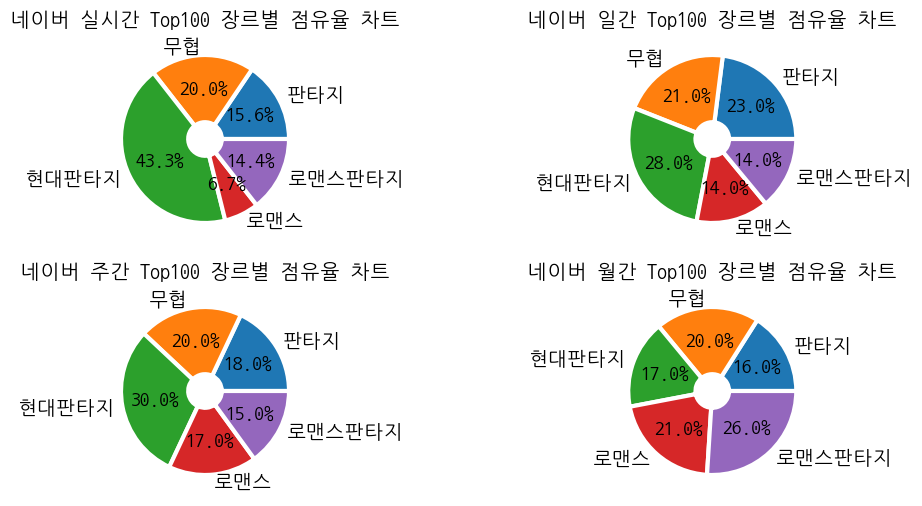

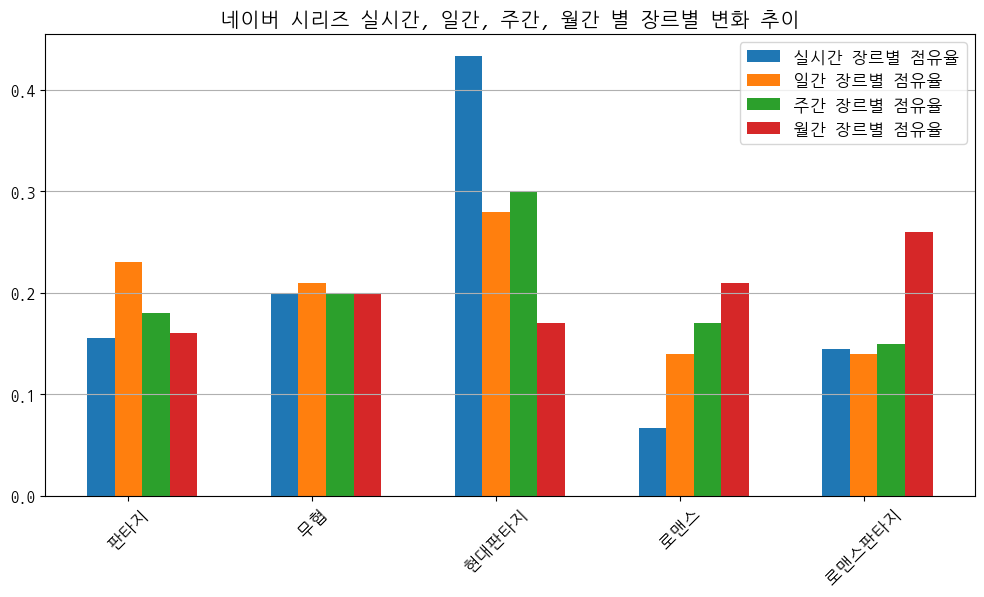

In [4]:
# 실시간 장르별 숫자
N_fan = N_now.판타지.sum()
N_mu = N_now.무협.sum()
N_hfan = N_now.현판.sum()
N_roman = N_now.로맨스.sum()
N_rofan = N_now.로판.sum()

# 장르별 숫자를 모아 놓은 리스트
Ngenre_now_List=[N_fan, N_mu, N_hfan, N_roman, N_rofan]
Ngenre_List = ['판타지', '무협', '현대판타지', '로맨스', '로맨스판타지']
# total 구하기
total_now = sum(Ngenre_now_List)
print(total_now) # 95개 정상

# 장르별 점유율 구하기
N_now_genre_shares = [genre / total_now for genre in Ngenre_now_List]
print(N_now_genre_shares)

# =====================================================================================================================

# 일간 장르별 숫자
N_day_fan = N_day.판타지.sum()
N_day_mu = N_day.무협.sum()
N_day_hfan = N_day.현판.sum()
N_day_roman = N_day.로맨스.sum()
N_day_rofan = N_day.로판.sum()

# 장르별 숫자를 모아 놓은 리스트
Ngenre_day_List=[N_day_fan, N_day_mu, N_day_hfan, N_day_roman, N_day_rofan]
# total 구하기
total_day = sum(Ngenre_day_List)
print(total_day) # 100개 정상

# 장르별 점유율 구하기
N_day_genre_shares = [genre / total_day for genre in Ngenre_day_List]
print(N_day_genre_shares)

# =====================================================================================================================

# 주간 장르별 숫자
N_week_fan = N_week.판타지.sum()
N_week_mu = N_week.무협.sum()
N_week_hfan = N_week.현판.sum()
N_week_roman = N_week.로맨스.sum()
N_week_rofan = N_week.로판.sum()

# 장르별 숫자를 모아 놓은 리스트
Ngenre_week_List=[N_week_fan, N_week_mu, N_week_hfan, N_week_roman, N_week_rofan]
# total 구하기
total_week = sum(Ngenre_week_List)
print(total_week) # 100개 정상

# 장르별 점유율 구하기
N_week_genre_shares = [genre / total_week for genre in Ngenre_week_List]
print(N_week_genre_shares)

# =====================================================================================================================

# 월간 장르별 숫자
N_month_fan = N_month.판타지.sum()
N_month_mu = N_month.무협.sum()
N_month_hfan = N_month.현판.sum()
N_month_roman = N_month.로맨스.sum()
N_month_rofan = N_month.로판.sum()

# 월간 장르별 숫자를 모아 놓은 리스트
Ngenre_month_List=[N_month_fan, N_month_mu, N_month_hfan, N_month_roman, N_month_rofan]
# total 구하기
total_month = sum(Ngenre_month_List)
print(total_month) # 100개 정상

# 장르별 점유율 구하기
N_month_genre_shares = [genre / total_month for genre in Ngenre_month_List]
print(N_month_genre_shares)

# =====================================================================================================================

# 시각화

plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.title('네이버 실시간 Top100 장르별 점유율 차트')
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(N_now_genre_shares, labels=Ngenre_List, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 14})

plt.subplot(2,2,2)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.title('네이버 일간 Top100 장르별 점유율 차트')
plt.pie(N_day_genre_shares, labels=Ngenre_List, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 14})

plt.subplot(2,2,3)
plt.title('네이버 주간 Top100 장르별 점유율 차트')
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(N_week_genre_shares, labels=Ngenre_List, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 14})

plt.subplot(2,2,4)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.title('네이버 월간 Top100 장르별 점유율 차트')
plt.pie(N_month_genre_shares, labels=Ngenre_List, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 14})

index = np.arange(len(Ngenre_List))
w = 0.15

plt.figure(figsize=(12, 6))
plt.bar(index-w, N_now_genre_shares, label='실시간 장르별 점유율', width=w)
plt.bar(index, N_day_genre_shares, label='일간 장르별 점유율', width=w)
plt.bar(index+w, N_week_genre_shares, label='주간 장르별 점유율', width=w)
plt.bar(index+2*w, N_month_genre_shares, label='월간 장르별 점유율', width=w)

plt.legend()
plt.xticks(index, Ngenre_List, rotation=45)
plt.title('네이버 시리즈 실시간, 일간, 주간, 월간 별 장르별 변화 추이')
plt.grid(axis='y')

plt.show()

In [5]:
Kdf = pd.read_csv('./data/Kakao_Now300.txt', index_col=0)
Kdf

,제목,장르,작가,평점,로맨스 판타지,현대 판타지,무협,판타지,로맨스,드라마
1,마론 후작,로맨스 판타지,자야,10.0,True,False,False,False,False,False
2,신 내린 명품 디자이너,현대 판타지,신줏단지,9.6,False,True,False,False,False,False
3,흑백무제,무협,현임,9.8,False,False,True,False,False,False
4,살인귀 황태자를 교육하는 법,로맨스 판타지,구운빵,9.6,True,False,False,False,False,False
5,천재 궁수의 스트리밍,판타지,멍멍킴,9.9,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
261,황녀가 깽판 침,로맨스 판타지,박귀리,9.9,True,False,False,False,False,False
262,회귀자의 증권사 생활,현대 판타지,유재무,9.6,False,True,False,False,False,False
263,이혼 후 코인 대박,현대 판타지,어둠의Dark,9.2,False,True,False,False,False,False
264,명가의 역대급 재능천재로 환생했다,판타지,플라이스,9.7,False,False,False,True,False,False


[70, 5, 52, 90, 47, 1]
['로맨스 판타지', '로맨스', '현대 판타지', '판타지', '무협', '드라마']


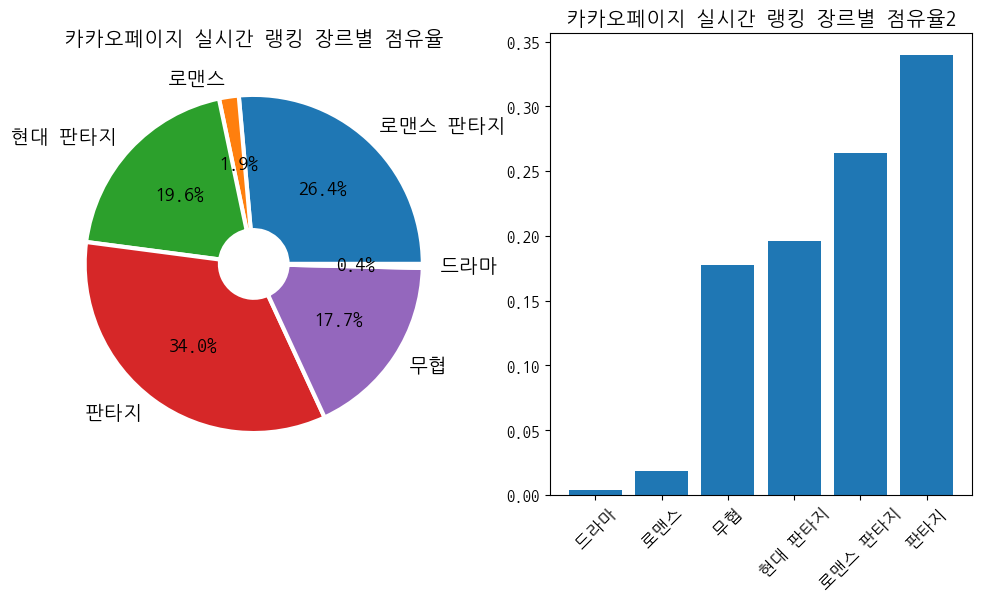

In [44]:
# 카카오페이지 실시간 랭킹 데이터 가져와서 장르별 숫자, 점유율 구함
#print(Kdf.장르.unique())
Kdf_rofan = Kdf['로맨스 판타지'].sum()
Kdf_roman = Kdf['로맨스'].sum()
Kdf_hfan = Kdf['현대 판타지'].sum()
Kdf_fan = Kdf['판타지'].sum()
Kdf_mu = Kdf['무협'].sum()
Kdf_drama = Kdf['드라마'].sum()
Kdf_List = [Kdf_rofan, Kdf_roman, Kdf_hfan, Kdf_fan, Kdf_mu, Kdf_drama]
Kdf_gnere_List = ['로맨스 판타지', '로맨스', '현대 판타지', '판타지', '무협', '드라마']
print(Kdf_List)
print(Kdf_gnere_List)
#print(sum(Kdf_List))
Kdf_total = sum(Kdf_List)
Kdf_gnere_shares = [gnere / Kdf_total for gnere in Kdf_List]
#print(Kdf_gnere_shares)
#print(sum(Kdf_gnere_shares))

#===============================================================================================

# 시각화

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('카카오페이지 실시간 랭킹 장르별 점유율')
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(Kdf_gnere_shares, labels=Kdf_gnere_List, autopct='%.1f%%', wedgeprops=wedgeprops, textprops={'fontsize': 14})

plt.subplot(1,2,2)
Kdf_gnere_shares.sort()
Kdf_gnere_List = ['드라마', '로맨스','무협','현대 판타지','로맨스 판타지', '판타지'] 
plt.title('카카오페이지 실시간 랭킹 장르별 점유율2')
plt.bar(Kdf_gnere_List, Kdf_gnere_shares)
plt.xticks(rotation=45)
plt.show()